In [1]:
from system_development.strategies.trend_pullback_v1.run_backtest import (
    run_backtest_for_default_universe,
)



=== Running backtest for ^GSPC ===

Signal counts for ^GSPC:
Signal
 0    2721
 1      18
-1       9
Name: count, dtype: int64


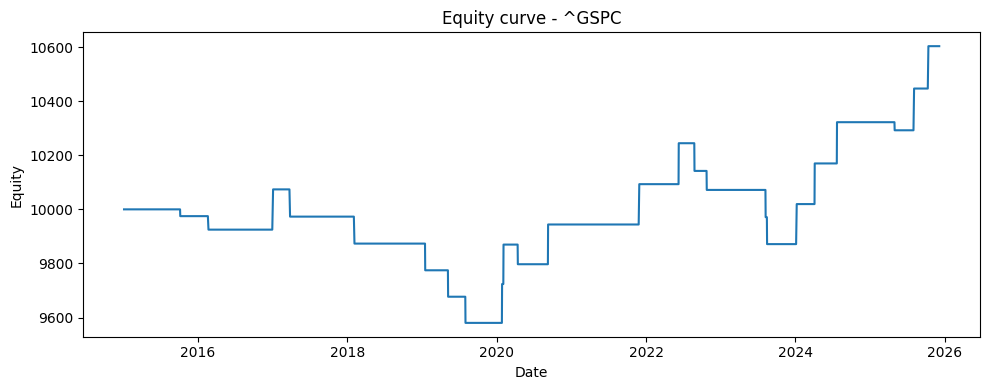


=== Running backtest for ^NDX ===

Signal counts for ^NDX:
Signal
 0    2718
 1      22
-1       8
Name: count, dtype: int64


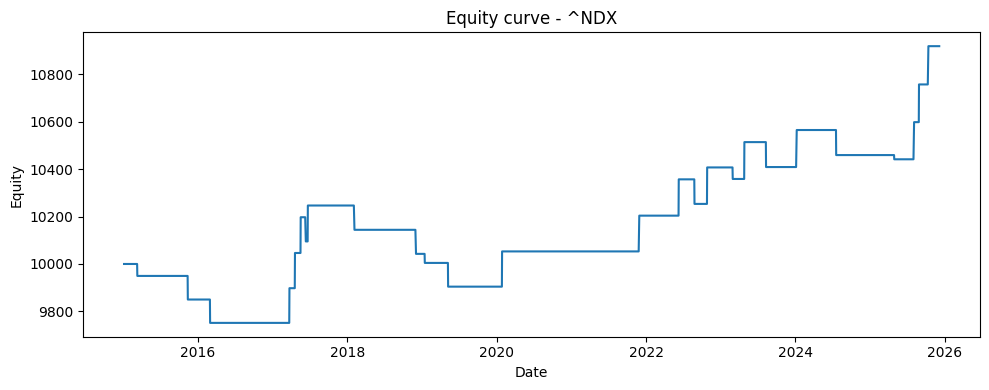


=== Running backtest for ^FTSE ===

Signal counts for ^FTSE:
Signal
 0    2735
 1      15
-1      11
Name: count, dtype: int64


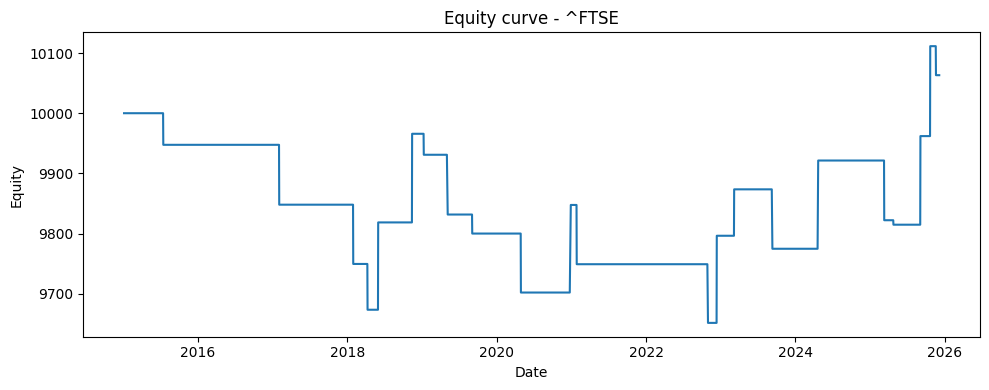


=== Running backtest for GBPUSD=X ===

Signal counts for GBPUSD=X:
Signal
 0    2810
-1      23
 1      13
Name: count, dtype: int64


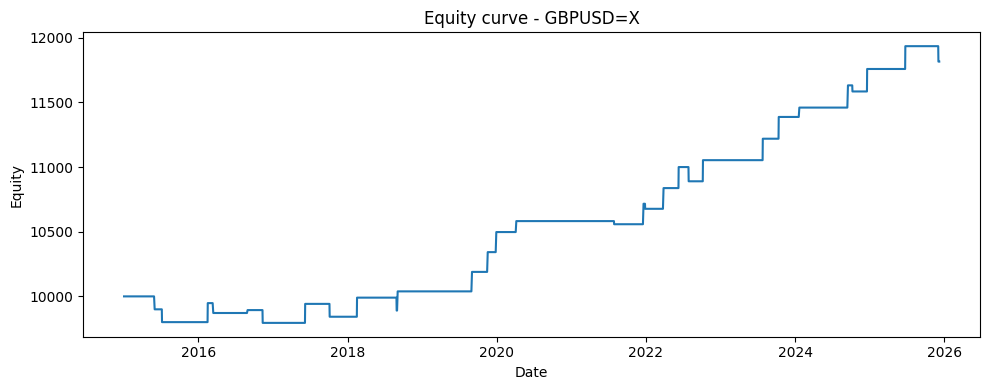


=== Running backtest for EURUSD=X ===

Signal counts for EURUSD=X:
Signal
 0    2811
-1      17
 1      17
Name: count, dtype: int64


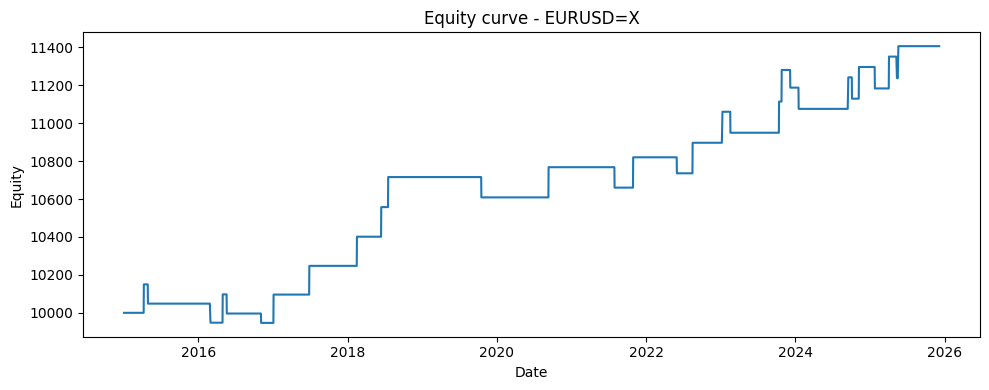


=== Running backtest for USDJPY=X ===

Signal counts for USDJPY=X:
Signal
 0    2808
-1      19
 1      16
Name: count, dtype: int64


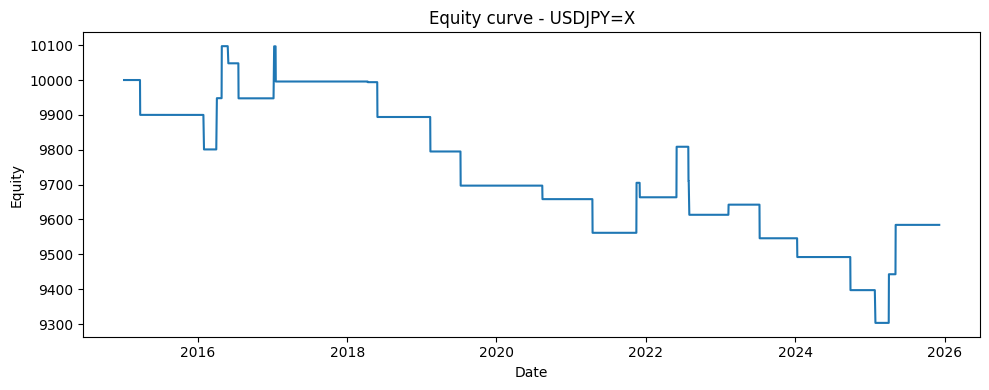


=== Backtest statistics for PORTFOLIO_EQUAL_WEIGHT ===
start_equity        : 10000.0000
end_equity          : 11610.3623
total_return_pct    :    16.10%
max_drawdown_pct    :    -2.02%
num_trades          : 159.0000
win_rate_pct        :    47.80%
avg_win             : 147.7244
avg_loss            : -82.3718
profit_factor       :   1.6421
sharpe_ratio        :   0.8832


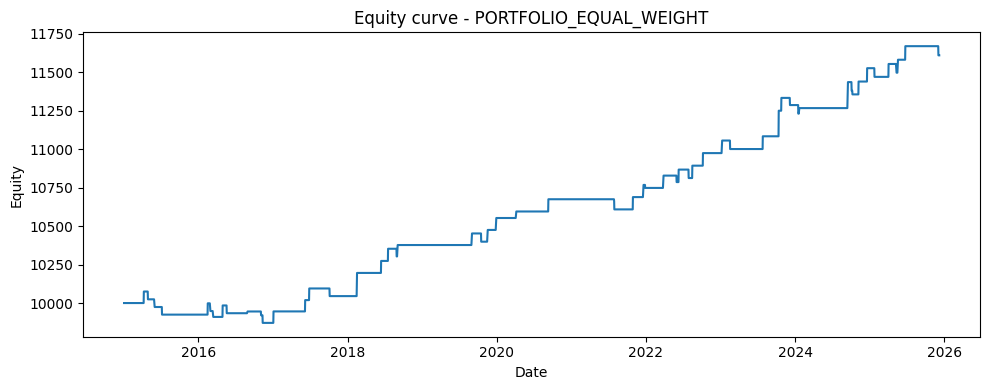


=== Backtest statistics for ^GSPC ===
start_equity        : 10000.0000
end_equity          : 10603.5080
total_return_pct    :     6.04%
max_drawdown_pct    :    -4.90%
num_trades          :  24.0000
win_rate_pct        :    45.83%
avg_win             : 149.8136
avg_loss            : -80.3417
profit_factor       :   1.5778
sharpe_ratio        :   0.3124

=== Backtest statistics for ^NDX ===
start_equity        : 10000.0000
end_equity          : 10918.3147
total_return_pct    :     9.18%
max_drawdown_pct    :    -3.34%
num_trades          :  26.0000
win_rate_pct        :    50.00%
avg_win             : 153.1946
avg_loss            : -82.5550
profit_factor       :   1.8557
sharpe_ratio        :   0.4361

=== Backtest statistics for ^FTSE ===
start_equity        : 10000.0000
end_equity          : 10063.1897
total_return_pct    :     0.63%
max_drawdown_pct    :    -3.48%
num_trades          :  22.0000
win_rate_pct        :    36.36%
avg_win             : 137.8859
avg_loss            : -74.

In [2]:
# noinspection PyPackageRequirements
if __name__ == "__main__":

    results = run_backtest_for_default_universe(
        start="2015-01-01",
        end=None,
        interval="1d",   # later we can do '4h'
        plot=True,
        portfolio=True,
    )

In [5]:
# Debug

In [3]:
from system_development.engine.data_loader import download_price_data
from system_development.strategies.trend_pullback_v1.config import DEFAULT_PARAMS
from system_development.strategies.trend_pullback_v1.rules import prepare_dataframe

symbol = "^GSPC"

raw = download_price_data(symbol, start="2015-01-01", interval="1d")
df = prepare_dataframe(raw, DEFAULT_PARAMS)

df["Signal"].value_counts()
df[["Close", "EMA_Fast", "EMA_Slow", "RSI", "ADX", "Trend", "Signal"]].Signal.max()


np.int64(0)